<a href="https://colab.research.google.com/github/kylie17kelly/Machine-Learning-Projects/blob/main/Linear_and_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import sklearn.metrics

#Set seaborn as the preferred interface
sns.set()

#Set seed for consistent results
rand_state=1000

In [ ]:
%%shell
jupyter nbconvert --to html /content/HW4.ipynb

[NbConvertApp] Converting notebook /content/HW4.ipynb to html
[NbConvertApp] Writing 454752 bytes to /content/HW4.html


In [ ]:
#Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/fall22/data/HW_data/HW4/nyc-rolling-sales_clean.csv')
df.head() #Output the first five observations and ensure that the data is cleaned

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
2,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11
3,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9
4,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8


In [ ]:
df.keys()
#looking at columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'sale_year', 'sale_month'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         30236 non-null  object 
 1   NEIGHBORHOOD                    30236 non-null  object 
 2   BUILDING CLASS CATEGORY         30236 non-null  object 
 3   TAX CLASS AT PRESENT            30236 non-null  object 
 4   BUILDING CLASS AT PRESENT       30236 non-null  object 
 5   ZIP CODE                        30236 non-null  int64  
 6   RESIDENTIAL UNITS               30236 non-null  int64  
 7   COMMERCIAL UNITS                30236 non-null  int64  
 8   TOTAL UNITS                     30236 non-null  int64  
 9   LAND SQUARE FEET                30236 non-null  float64
 10  GROSS SQUARE FEET               30236 non-null  float64
 11  YEAR BUILT                      30236 non-null  int64  
 12  TAX CLASS AT TIME OF SALE       

In [ ]:
#adding sale days to our data.
##seperating sale days from the original SALE.DATE feature
df['sale_days'] = pd.DatetimeIndex(df['SALE DATE']) .day.astype("category")

### **Linear Regression: NYC Property Sales Dataset**

###Question 1.1: Changing Feature Type

In [ ]:
df.nunique()
#looking at unique variables

BOROUGH                              5
NEIGHBORHOOD                       242
BUILDING CLASS CATEGORY             38
TAX CLASS AT PRESENT                 9
BUILDING CLASS AT PRESENT          115
ZIP CODE                           171
RESIDENTIAL UNITS                   72
COMMERCIAL UNITS                    20
TOTAL UNITS                         74
LAND SQUARE FEET                  4105
GROSS SQUARE FEET                 3589
YEAR BUILT                         137
TAX CLASS AT TIME OF SALE            3
BUILDING CLASS AT TIME OF SALE     115
SALE PRICE                        4848
SALE DATE                          327
sale_year                            2
sale_month                          12
sale_days                           31
dtype: int64

In [ ]:
#Defining categorical variables
## we know which variables are categorical based on the unique value
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'sale_year', 'sale_month', 'sale_days']

for col in categorical: 
    df[col] = df[col].astype("category")

In [ ]:
#Defining numerical variables:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
#dropping the sale date since we are not interpretting it in our analysis
df.drop('SALE DATE', axis=1, inplace = False)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,sale_year,sale_month,sale_days
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016,9,23
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016,9,23
2,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016,11,15
3,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016,9,28
4,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30231,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B2,10309,2,0,2,11088.0,2160.0,1994,1,B2,648000.0,2016,12,7
30232,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016,11,28
30233,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017,4,21
30234,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B2,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017,7,5


In [ ]:
#checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         30236 non-null  category
 1   NEIGHBORHOOD                    30236 non-null  category
 2   BUILDING CLASS CATEGORY         30236 non-null  category
 3   TAX CLASS AT PRESENT            30236 non-null  category
 4   BUILDING CLASS AT PRESENT       30236 non-null  category
 5   ZIP CODE                        30236 non-null  category
 6   RESIDENTIAL UNITS               30236 non-null  int64   
 7   COMMERCIAL UNITS                30236 non-null  int64   
 8   TOTAL UNITS                     30236 non-null  int64   
 9   LAND SQUARE FEET                30236 non-null  float64 
 10  GROSS SQUARE FEET               30236 non-null  float64 
 11  YEAR BUILT                      30236 non-null  category
 12  TAX CLASS AT TIME 

###Question 1.2: Defining Target Variable

In [ ]:
#defining the target variable
df['target'] = np.log(df['SALE PRICE']) #Target variable



> Transforming the target variable to be logged will boost the performance of our linear model because it will allow our distribution to be well-behaved and more normal. Using the logthe variable will improve the fit of the model by transforming the distribution of the feature and reducve overfitting.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         30236 non-null  category
 1   NEIGHBORHOOD                    30236 non-null  category
 2   BUILDING CLASS CATEGORY         30236 non-null  category
 3   TAX CLASS AT PRESENT            30236 non-null  category
 4   BUILDING CLASS AT PRESENT       30236 non-null  category
 5   ZIP CODE                        30236 non-null  category
 6   RESIDENTIAL UNITS               30236 non-null  int64   
 7   COMMERCIAL UNITS                30236 non-null  int64   
 8   TOTAL UNITS                     30236 non-null  int64   
 9   LAND SQUARE FEET                30236 non-null  float64 
 10  GROSS SQUARE FEET               30236 non-null  float64 
 11  YEAR BUILT                      30236 non-null  category
 12  TAX CLASS AT TIME 

In [ ]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month,sale_days,target
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9,23,15.185745
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9,23,14.976421
2,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11,15,15.009433
3,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9,28,15.123843
4,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8,31,14.275363


In [ ]:
#Checking for null values
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
sale_year                         0
sale_month                        0
sale_days                         0
target                            0
dtype: int64

###Question 1.3: Defining Feature Space



> The feature space (X) will include all the variables to increase the accuracy of our regression. Using more features will lead to a more accurate prediction. However, we are aware that having more features may lead to overfitting. We account for this in our target variable by taking the natural log of our target feature, which is aforementioned.



In [ ]:
#looking at feature space
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month,sale_days,target
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9,23,15.185745
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9,23,14.976421
2,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11,15,15.009433
3,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9,28,15.123843
4,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8,31,14.275363


In [ ]:
#creating dummy variables for categorical features and dropping the extra column created during dummy variable creation.
df = pd.get_dummies(df, drop_first=True)

In [ ]:
#checking to see dummy variables were created
df.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,target,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,...,sale_days_22,sale_days_23,sale_days_24,sale_days_25,sale_days_26,sale_days_27,sale_days_28,sale_days_29,sale_days_30,sale_days_31
0,10,0,10,2272.0,6794.0,3936272.0,15.185745,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,8,0,8,1750.0,4226.0,3192840.0,14.976421,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,4,1520.0,3360.0,3300000.0,15.009433,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1218.0,3586.0,3700000.0,15.123843,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,9,0,9,1566.0,6330.0,1583840.0,14.275363,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Columns: 1201 entries, RESIDENTIAL UNITS to sale_days_31
dtypes: float64(4), int64(3), uint8(1194)
memory usage: 36.0 MB




> Looking at the output for df.info() , we can see that there are 1194 features now! This was due to the creation of dummy variables for our categorical features. 



## Question 1.4: Splitting the Data into Train and Test

In [ ]:
y = df['target']
X = df.drop('target', axis=1, inplace = False)


In [ ]:
#Let's split the data into 30% test and 70% train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rand_state)

#Percentage of training set. Output shows 70% of data is train
np.round(len(X_train)/len(X),3)

0.7

In [ ]:
X_train.head()


,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,...,sale_days_22,sale_days_23,sale_days_24,sale_days_25,sale_days_26,sale_days_27,sale_days_28,sale_days_29,sale_days_30,sale_days_31
27919,1,0,1,4000.0,1105.0,480000.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
26034,1,0,1,3918.0,1700.0,760000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27154,2,0,2,4000.0,2012.0,780000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13684,2,0,2,2003.0,2532.0,1140000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28389,1,0,1,2938.0,1632.0,600000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,...,sale_days_22,sale_days_23,sale_days_24,sale_days_25,sale_days_26,sale_days_27,sale_days_28,sale_days_29,sale_days_30,sale_days_31
3767,2,0,2,2425.0,3601.0,1300000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24270,2,0,2,2272.0,2100.0,540000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
27718,2,0,2,3572.0,1718.0,650000.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6232,4,0,4,2500.0,3116.0,390000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11161,2,0,2,2525.0,2000.0,900000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head()

27919    13.081541
26034    13.541074
27154    13.567049
13684    13.946539
28389    13.304685
Name: target, dtype: float64

In [ ]:
X_train.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,...,sale_days_22,sale_days_23,sale_days_24,sale_days_25,sale_days_26,sale_days_27,sale_days_28,sale_days_29,sale_days_30,sale_days_31
27919,1,0,1,4000.0,1105.0,480000.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
26034,1,0,1,3918.0,1700.0,760000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27154,2,0,2,4000.0,2012.0,780000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13684,2,0,2,2003.0,2532.0,1140000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28389,1,0,1,2938.0,1632.0,600000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Question 1.6: Using Linear Regression from Sklearn

In [ ]:
#Linear regression

reg_model = LinearRegression()

In [ ]:
reg_model.fit(X_train, y_train)

LinearRegression()

### Making Predictions in the Test Set (Question 1.6 cont)

In [ ]:
y_hat = reg_model.predict(X_test)
#defining y_hat as the predicted values for the test set

In [ ]:
y_hat

array([14.03980338, 13.02490526, 13.28095609, ..., 13.49988858,
       13.04689148, 12.9713638 ])

In [ ]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_test, y_test),3))
#R-squared for the train and test set

Training data R-squared: 0.808
Test data R-squared: 0.782




> The R-squared for both the training data and test data are above 75%, suggesting that the model does well when reporting the accuracy of the predicted values. 



In [ ]:
#creating dataframe called log_predictions that includes the actual test results, the predicted test restults, and the residuals
# of the test results. (All for the test set)
log_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})

In [ ]:
#displaying table to show actuals, predictions, and residuals
log_predictions.head()

,actuals,predictions,resid
3767,14.077875,14.039803,0.038071
24270,13.199324,13.024905,0.174419
27718,13.384728,13.280956,0.103772
6232,12.873902,12.944505,-0.070603
11161,13.710150,13.651269,0.058881


In [ ]:
#calculating mean sqaured errors
#mean squared error (errors: resid) round up to 3 digits
MSE_test = np.mean(np.square(log_predictions['resid'])) 
np.round(MSE_test,3)

0.113

In [ ]:
#calculating RMSE
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.335



> The root mean sqaure error (RMSE) for the dataset tells us the average distance between the pedicted values from the model and the actual values in the dataset using a train and test model method. The RMSE for this dataset using linear regression is 0.335. Because the RMSE is realtively low (0-1), it signifies that our model "fits" the dataset rather well. This signifies that the model can relatively predict the data accurately. 




### Question 1.7 and 1.8

In [ ]:
my_estimator = LinearRegression()

In [ ]:
#Estimating RMSE_test using K-Fold Cross Validation K = 5
##calculating negative MSE
##using sqaure root to get the RMSE
##taking the average of all the RMSE's and rounding
MSE = -cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")
RMSE = np.sqrt(MSE)
RMSE_CV5 = np.mean(RMSE)
np.round(RMSE_CV5, 3)

0.422

In [ ]:
#Estimating RMSE_test using K-Fold Cross Validation K = 10
##calculating negative MSE
##using sqaure root to get the RMSE
##taking the average of all the RMSE's and rounding
MSE1 = -cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
RMSE1 = np.sqrt(MSE1)
RMSE_CV10 = np.mean(RMSE1)
np.round(RMSE_CV10, 3)

0.423



> The RMSE_test for a K-Fold of 5 is 0.422, and the RMSE_test for a K-Fold of 10 is 0.423. Without using a cross validation, the RMSE_test is 0.335. Because the K-Fold cross validation method splits the data up into k-number of folds, we are able to calculate the RMSE using several different varitaions of training and test sets, thus allowing us to obtain a more unbiased and accurate test of the RMSE. The RMSE in cross-validation measures the average distance between the observed known outcome values and the values predicted by the model. The lower the RMSE, the better the model can predict the values. With an RMSE around 0.42 for a 5-fold and 10-fold cross validation, we can assume that the model predicts the actual values rather well. 



### **Polynomial Regression: Boston Dataset**

### Question 2.1

In [ ]:
#Import boston dataset
df_poly = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/fall22/data/HW_data/HW4/boston_polynomial.csv')
df_poly.head() 
#Output the first five observations and ensure that the data is cleaned

,price,LSTAT
0,24.0,4.98
1,21.6,9.14
2,34.7,4.03
3,33.4,2.94
4,36.2,5.33


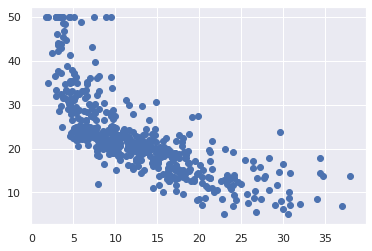

In [ ]:
#defining x and y variables to show polynomial regression on scatter plot
x= np.array(df_poly['LSTAT'])
y= np.array(df_poly['price'])
plt.scatter(x,y)




> This scatterplot shows that the distribution of the data is not linear, and thus using a different model from linear regression may be better suited for this data. Because of this, we will use a polynomial regression model. 



### Question 2.2

In [ ]:
#using Sklearn to import PolynomialFeatures
##setting polynomial degree to 5

polynomial_degree = 5
poly = PolynomialFeatures(degree =polynomial_degree)

In [ ]:
X_poly= pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))
X_poly.head()
#this shows our feature space. 
##The feature space has a dimensionality of 5

,0,1,2,3,4,5
0,1.0,4.98,24.8004,123.505992,615.059840,3062.998004
1,1.0,9.14,83.5396,763.551944,6978.864768,63786.823981
2,1.0,4.03,16.2409,65.450827,263.766833,1062.980336
3,1.0,2.94,8.6436,25.412184,74.711821,219.652754
4,1.0,5.33,28.4089,151.419437,807.065599,4301.659644


### Question 2.3: Splitting the Data

In [ ]:
#splitting the train/test set to be 70% train 30% test.
# Using same seed number as the linear regression(setting random_state=rand_state)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=rand_state)

np.round(len(X_train_poly)/len(X_poly),3)

0.7

### Question 2.4:

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
#using train set

LinearRegression()

In [ ]:
#creating y_hat (predicted values)
y_hat_test_poly = poly_model.predict(X_test_poly)

In [ ]:
#creating new datafram called predictions which has three columns: actual, predictions, and residuals
predictions = pd.DataFrame({'actuals':y_test_poly, 'predictions':y_hat_test_poly, 'resid': y_test_poly - y_hat_test_poly})
predictions.head()

,actuals,predictions,resid
0,21.8,21.514132,0.285868
1,10.2,18.150191,-7.950191
2,15.2,16.197956,-0.997956
3,43.5,40.765901,2.734099
4,50.0,22.373052,27.626948


In [ ]:
#creating MSE for polynomial regression using residuals
##using test set
MSE_test_poly = np.mean(np.square(predictions['resid']))
np.round(MSE_test_poly,3)

#sqaure-root the MSE for polynomial regression to get RMSE
##using test set
RMSE_test_poly = np.sqrt(MSE_test_poly)
np.round(RMSE_test_poly,3)

5.204

> The RMSE indicates how well the model predicted the target feature's value in absolute terms. The RMSE for the polynomial regression using the set train and test set is 5.204



### Question 2.5

In [ ]:
estimator2 = LinearRegression()

In [ ]:
#Estimating RMSE_poly_test using K-Fold Cross Validation K = 5
##calculating MSE
##using sqaure root to get the RMSE
##taking the average of all the RMSE's and rounding
MSE_test_poly2 = -cross_val_score(estimator=estimator2, X=X_train_poly, y=y_train_poly, cv=5, scoring="neg_mean_squared_error")
RMSE_POLY_CV5 = np.sqrt(MSE_test_poly2)
RMSE_POLY_CV5 = np.mean(RMSE_POLY_CV5)
np.round(RMSE_POLY_CV5, 3)

5.262



> The RMSE using K-Fold cross validation when K = 5 is 0.422 meaning the model is predicting the actual values of the polynomial regression rather well. Cross-validation allows us to get a more accurate RMSE since training and testing the data is repeated using 5 different folds, and we take the average of all 5 RMSE's. Because of this the RMSE is less than the RMSE without cross validation (5.204)



### Question 2.6

In [ ]:
#Construct a table with 3 columns: Degree (going from 1 to 10), RMSE_train and RMSE_test.
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split




def my_polynomial_regression(poly_degree, X, y, test_size=0.3, rand_state=100):
    
    poly_features= PolynomialFeatures(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))   
    
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train_poly)
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test_poly)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train_poly - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)

  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test_poly - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)


  
#     print("Traning model fit")
#     print("R2_train = {}".format(R2_train))

#     print("-------------------------------------------")
#     print("MSE_train = {}".format(MSE_train))
#     print("RMSE_train = {}".format(RMSE_train))

#     print("-------------------------------------------")
#     print("MSE_test = {}".format(MSE_test))
#     print("RMSE_test = {}".format(RMSE_test))
    
    return poly_degree, RMSE_train, RMSE_test

    

In [ ]:
returns= []
for i in range(1,11):
    returns.append(my_polynomial_regression(poly_degree=i, X=x,y=y))
    
output = pd.DataFrame(returns, columns=['Degree', 'RMSE_train', 'RMSE_test'])
output

,Degree,RMSE_train,RMSE_test
0,1,5.92,6.88
1,2,5.13,6.32
2,3,4.95,6.26
3,4,4.82,6.16
4,5,4.72,6.15
5,6,4.70,6.17
6,7,4.69,6.17
7,8,4.69,6.16
8,9,4.69,6.15
9,10,4.69,6.15


### Question 2.7 and 2.8


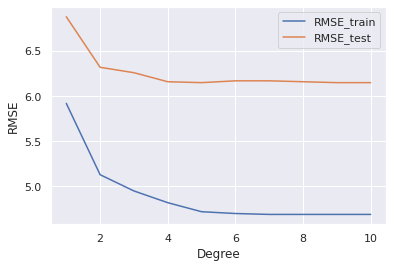

In [ ]:
#plotting the RMSE for the train and test set
output.set_index('Degree').plot() 
plt.ylabel("RMSE") 
plt.show()



> Looking at the graph above, we can see that the ideal RMSE is 10. At degree 10, both the RMSE of the train and test set are at their lowest. With both the train and test set at their lowest RMSE, it signifies that the model will be better at predicting values based on the model using a degree of 10. 

